In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

### Read and Evaluate Dataset

In [2]:
df = pd.read_excel('./formattedData.xlsx')
print(df.head())

   Year   Make Model  Kilometres Body_Type Engine        Transmission  \
0  2014  Acura   RDX      290000       SUV      4           Automatic   
1  2014  Acura   RDX      158868       SUV      6   6 Speed Automatic   
2  2016  Acura   MDX      226214       SUV      6           Automatic   
3  2019  Acura   MDX       42081       SUV      6   9 Speed Automatic   
4  2021  Acura   RDX       66960       SUV      4  10 Speed Automatic   

  Drivetrain       Exterior_Colour Interior_Colour  Passengers  Doors  \
0        AWD                 Black           Black           5      5   
1        AWD                Silver           Black           5      5   
2        AWD                 White           Black           7      5   
3        AWD   White Diamond Pearl           Black           5      5   
4        AWD  Majestic Black Pearl           Black           5      5   

  Fuel_Type       City   Highway  Price  
0       Gas  11.336434  8.668992  11600  
1       Gas  10.700000  7.300000  1799

### Evaluate Numeric Data Distribution

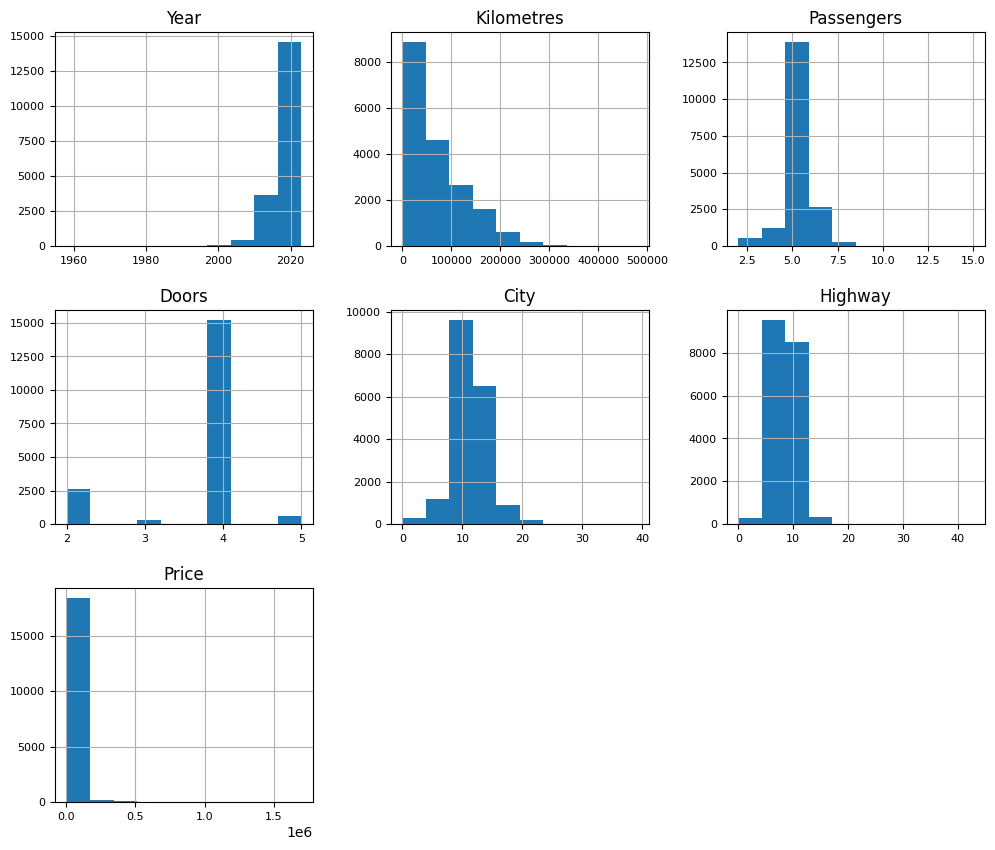

In [3]:
df.hist(figsize=(12, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Based on the plots, we can see there are outliers impacting the distribution. For example, Price is highly right-skewed. Since this will affect the performance of the model, we will remove outliers from the dataset.

### Preprocess Data
#### Remove Outliers

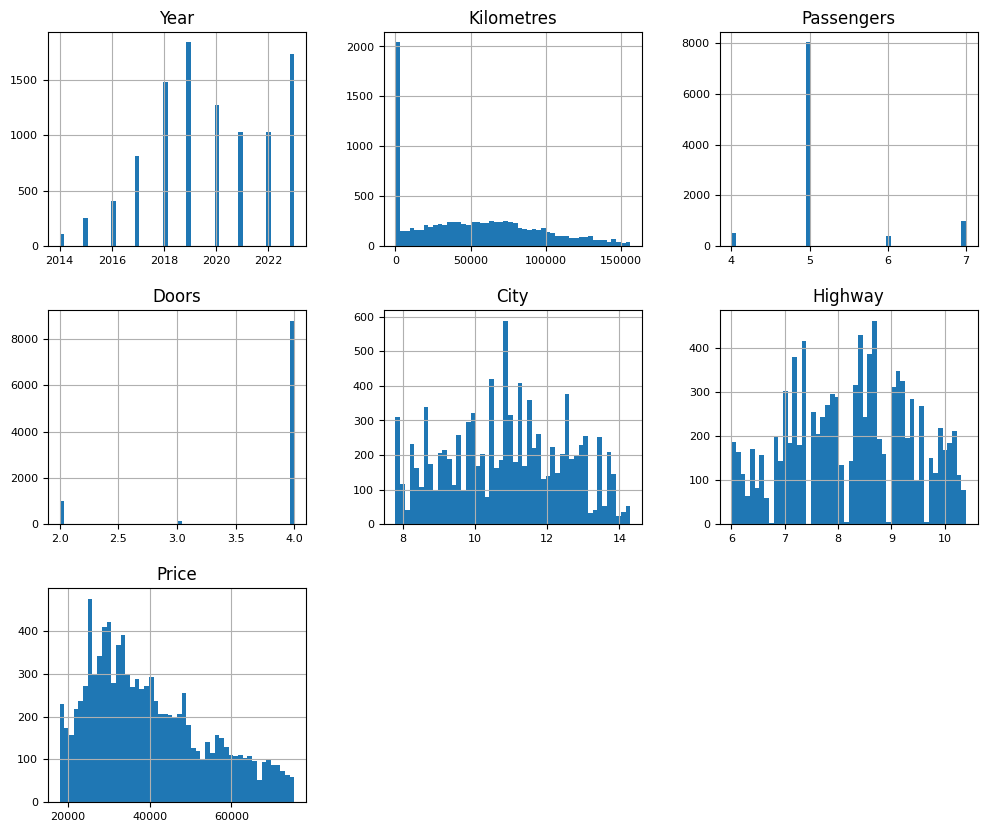

In [6]:
non_numeric_columns = ['Make', 'Model', 'Body_Type', 'Engine', 'Transmission', 'Drivetrain', 'Exterior_Colour', 'Interior_Colour', 'Fuel_Type']
numeric_columns = df.drop(non_numeric_columns, axis=1).columns
for column in numeric_columns:
    df = df[(df[column] >= df[column].quantile(0.01)) & (df[column] <= df[column].quantile(0.99))]
df.hist(figsize=(12, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

#### One-Hot Encoding
We cannot use regressor with categorical data like make and model. We will use one-hot encoding to convert them into binary columns.

In [7]:
df = pd.get_dummies(df, columns=non_numeric_columns)
print(df.head())

     Year  Kilometres  Passengers  Doors  City  Highway  Price  Make_Acura  \
584  2019       53052           7      4  12.2      9.0  43880        True   
585  2018       77127           7      4  12.6      9.0  36486        True   
586  2019       33032           5      4  11.0      8.6  40888        True   
587  2020       50702           5      4  11.0      8.6  44599        True   
588  2021       67950           5      4  11.3      9.1  46989        True   

     Make_Alfa Romeo  Make_Audi  ...  Interior_Colour_White  Fuel_Type_Diesel  \
584            False      False  ...                  False             False   
585            False      False  ...                  False             False   
586            False      False  ...                  False             False   
587            False      False  ...                  False             False   
588            False      False  ...                  False             False   

     Fuel_Type_Electric  Fuel_Type_Flexible 